# Happiness Report Analysis

#### The report will answer certain questions that can be drawn out from the data, and will try to find the relations of different factors in the best, avg and worst performing countries to see how to correlates to its happiness index using statistical modeling.

### Importing relevant libraries

In [2]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading the raw data

In [3]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('Backend/Data/2020.csv')

# Let's explore the top 5 rows of the df
raw_data

,Rank,CountryName,Region,Score,Gdp_Per_Capita,Soc_Support,Health_life_expectancy,Freedom_of_choice,Generosity,Percept_of_corrupt
0,1,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,2,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,3,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,4,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,5,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,150,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,151,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,152,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


### Preprocessing

### Exploring the descriptive statistics of the data

In [4]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe()

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Rank,Score,Gdp_Per_Capita,Soc_Support,Health_life_expectancy,Freedom_of_choice,Generosity,Percept_of_corrupt
count,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,44.311398,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,1.000000,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,39.000000,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,77.000000,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,115.000000,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,153.000000,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


In [5]:
## general correlation test
## values range from -1 to 1
## a positive value denotes that both the values have a direct relationship where as
## a negative value denotes a inverse relationship
raw_data.corr(method='pearson')

,Rank,Score,Gdp_Per_Capita,Soc_Support,Health_life_expectancy,Freedom_of_choice,Generosity,Percept_of_corrupt
Rank,1.000000,-0.985263,-0.777302,-0.749488,-0.769746,-0.583441,-0.044922,0.394355
Score,-0.985263,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043,-0.418305
Gdp_Per_Capita,-0.777302,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399,-0.334729
Soc_Support,-0.749488,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780,-0.210530
Health_life_expectancy,-0.769746,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852,-0.353841
Freedom_of_choice,-0.583441,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721,-0.420145
Generosity,-0.044922,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000,-0.278480
Percept_of_corrupt,0.394355,-0.418305,-0.334729,-0.210530,-0.353841,-0.420145,-0.278480,1.000000


##### the data above shows a general correlation table using the pearson correlation formula, but this data is recommended to get the best answer out of this report. There might be outliers, nonlinear values which we will further detail out using other statistical functions.

### Dealing with missing values

In [6]:
## for the preprocessing (data cleaning) purposes, its required to check for any empty values to
## avoid wrong computations ahead in the regression analysis.
raw_data.isnull().sum()

Rank                      0
CountryName               0
Region                    0
Score                     0
Gdp_Per_Capita            0
Soc_Support               0
Health_life_expectancy    0
Freedom_of_choice         0
Generosity                0
Percept_of_corrupt        0
dtype: int64

## Questions to figure out from the data

###### This happiness report generates a score that is based off several parameters over which a country is analyzed about their happiness level. The questions below for analysis are taking some of those parameters to visualize the pattern and see the differences between those countries, and providing us the insight of how those parameters are themselves effective in the happiness level of a certain country. The score breakdown is as follows:
###### National average of score (collected from data 2004-2019): 33% Social Support, 25% GDP per capita, 20% health life expectancy, 13% freedom of choice, 5% generosity, 4% percept of corruption 

### Question no. 1: Does having less percept_of_corrupt helps with the predicted score of the country?

In [7]:
# Although the percept of corrupt contributes to only 4% of the total average score, we will try to find out how it
# still effects in the rankings and how does a country's happiness score relates to it corruption perspective.

# Using regression analysis, we can understand the correlation between the dependent variable 'score' and the
# independent variable percept_of_corrupt

x1 = raw_data['Percept_of_corrupt']
y = raw_data['Score']

##### exploring the data using scatterplot

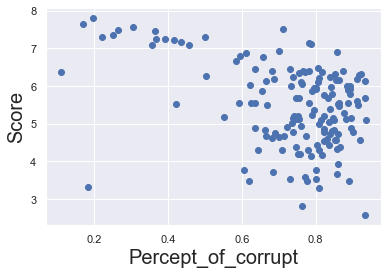

In [8]:
plt.scatter(x1,y)
plt.xlabel('Percept_of_corrupt',fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.show()

##### Using regression

In [9]:
# using sklearn to fit the data
reg = LinearRegression()
x = np.array(raw_data['Percept_of_corrupt'])
x = np.matrix(x).T.A
reg.fit(x,y)

# using statsmodel to list the summary of the data
modelX = sm.add_constant(x)
model = sm.OLS(y,modelX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     32.03
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           7.43e-08
Time:                        18:53:06   Log-Likelihood:                -218.16
No. Observations:                 153   AIC:                             440.3
Df Residuals:                     151   BIC:                             446.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4205      0.354     20.979      0.000       6.722       8.119
x1            -2.6561      0.469     -5.659      0.000      -3.583      -1.729
==============================================================================
Omnibus:                       10.972   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.400
Skew:                          -0.659   Prob(JB):                      0.00335
Kurtosis:                       3.225   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

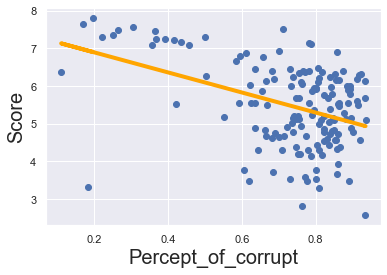

In [10]:
# creating the regression plot
plt.scatter(x,y)
yhat = -2.6561*x + 7.4205
fig = plt.plot(x,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('Percept_of_corrupt', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.show()

In [11]:
# using some random good, moderate and worst values for percept_of_corrupt ((0, 1) whereas 0 indicates less corruption
# and 1 indicates more corruption ) to predict the happiness scores

new_data = pd.DataFrame({'const':1,'Percept_of_corrupt':[0.13, 0.42, 0.93]})
new_data = new_data[['const','Percept_of_corrupt']]
new_data.rename(index={0:'Good', 1:'Moderate', 2:'Worst'})

# predicting the score
predictions = model.predict(new_data)
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename({0:'Good',1:'Moderate', 2: 'Worst'})

,const,Percept_of_corrupt,Predictions
Good,1,0.13,7.075163
Moderate,1,0.42,6.304906
Worst,1,0.93,4.950316


In [12]:
# using the actual best, worst and median value from the actual dataset to compare the result
idmax = pd.DataFrame(raw_data.iloc[raw_data['Percept_of_corrupt'].idxmax()]).transpose()
idmin = pd.DataFrame(raw_data.iloc[raw_data['Percept_of_corrupt'].idxmin()]).transpose()
idmed = pd.DataFrame(raw_data.iloc[int(len(raw_data)/2)]).transpose()

actData = [idmin, idmed, idmax]
act_data = pd.concat(actData).drop(["CountryName", "Region", "Gdp_Per_Capita", "Soc_Support", "Health_life_expectancy", "Freedom_of_choice", "Generosity"], axis=1)
Valtype = ["Good", "Moderate", "Worst"]
act_data['Valtype'] = Valtype
act_data = act_data[['Valtype','Rank','Percept_of_corrupt', 'Score']]
act_data.reset_index(drop=True, inplace=True)
#act_data.rename({0:'Best', 1:'Worst', 2:'Moderate'})
act_data

,Valtype,Rank,Percept_of_corrupt,Score
0,Good,31,0.109784,6.3771
1,Moderate,77,0.859931,5.515
2,Worst,96,0.935585,5.1015


##### 'What's interesting here is the country with the worst record in terms of percept of corruption is not below the 100th rank mark which makes it unique that certain other parameters are bumping up the total happiness score'

##### Based on the above analysis, it's evident that having less amount of corruption can lead to a happier lifestyle and a better happiness score. Also the regression plot is showing that the percept_of_corrupt only contributes 4% to the total avg score as the values are still scatter across the plot but the few outliers of less corrupt countries are getting the better scores is still visible with a lot of countries pooled around increased corrupt perception values. 

### Question no. 2: Are there any category leaders from the top 10 happiest countries?

In [13]:
# first listing down the top 10 countries
top10Countries = raw_data.head(10)
top10Countries

,Rank,CountryName,Region,Score,Gdp_Per_Capita,Soc_Support,Health_life_expectancy,Freedom_of_choice,Generosity,Percept_of_corrupt
0,1,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,2,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,3,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,4,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,5,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
5,6,Netherlands,Western Europe,7.4489,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717
6,7,Sweden,Western Europe,7.3535,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880
7,8,New Zealand,North America and ANZ,7.2996,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139
8,9,Austria,Western Europe,7.2942,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955
9,10,Luxembourg,Western Europe,7.2375,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084


In [14]:
# creating a dataframe of the the categories
categories = ['Gdp_Per_Capita','Soc_Support','Health_life_expectancy','Freedom_of_choice','Generosity',
              "Percept_of_corrupt"]
catgLeaders = pd.DataFrame()
catgLeaders = catgLeaders.reindex(columns = catgLeaders.columns.tolist()  
                                  + ['Categories','Overall Rank','CountryName','Score', 'Category Avg Score','% Difference From Avg ']) 
catgLeaders
# max value in all categories except for percept_of_corrupt will be considered as a leader, where as the min value
# of percept_of_corrupt will be considered as leader 

for catg in categories:
    if(catg != 'Percept_of_corrupt'):
        maxVal =  pd.DataFrame(raw_data.iloc[raw_data[catg].idxmax()]).transpose()
        l1 = maxVal.columns.tolist()
        l2 = ["Rank", "CountryName", catg]
        l3 = [x for x in l1 if x not in l2]
        newDataRow = maxVal.drop(l3, axis=1)
        newDataRow.columns = ["Overall Rank", "CountryName", "Score"]
        newDataRow["Category Avg Score"] = raw_data[catg].mean()
        newDataRow["% Difference From Avg "] = abs((newDataRow["Score"] - raw_data[catg].mean())/raw_data[catg].mean())*100
        newDataRow["Categories"] = catg
        newDataRow = newDataRow[["Categories", "Overall Rank", "CountryName", "Score", "Category Avg Score","% Difference From Avg "]]
        catgLeaders = catgLeaders.append(newDataRow, ignore_index=True)
        #catgLeaders["Rank", "CountryName", "Score", "Difference From Avg"] = newDataRow["Rank", "CountryName", "Score", "Difference From Avg"]
    else:
        maxVal = pd.DataFrame(raw_data.iloc[raw_data[catg].idxmin()]).transpose()
        l1 = maxVal.columns.tolist()
        l2 = ["Rank", "CountryName", catg]
        l3 = [x for x in l1 if x not in l2]
        newDataRow = maxVal.drop(l3, axis=1)
        newDataRow.columns = ["Overall Rank", "CountryName", "Score"]
        newDataRow["Category Avg Score"] = raw_data[catg].mean()
        newDataRow["% Difference From Avg "] = abs((newDataRow["Score"] - raw_data[catg].mean())/raw_data[catg].mean())*100
        newDataRow["Categories"] = catg
        newDataRow = newDataRow[["Categories", "Overall Rank", "CountryName", "Score", "Category Avg Score","% Difference From Avg "]]
        catgLeaders = catgLeaders.append(newDataRow, ignore_index=True)
        #catgLeaders["Rank", "CountryName", "Score", "Difference From Avg"] = newDataRow["Rank", "CountryName", "Score", "Difference From Avg"]

catgLeaders
    

,Categories,Overall Rank,CountryName,Score,Category Avg Score,% Difference From Avg
0,Gdp_Per_Capita,10,Luxembourg,11.4507,9.295706,23.1825
1,Soc_Support,4,Iceland,0.97467,0.808721,20.5199
2,Health_life_expectancy,31,Singapore,76.8046,64.445529,19.1775
3,Freedom_of_choice,38,Uzbekistan,0.974998,0.783360,24.4636
4,Generosity,133,Myanmar,0.560664,-0.014568,3948.52
5,Percept_of_corrupt,31,Singapore,0.109784,0.733120,85.0251


###### Some interesting key points:
###### 1) Only two countries from the top 10 are category leaders.
###### 2) The happiest country in the world (Finland) is not a category leader in any of them, maybe being consistent in all of them is key.
###### 3) Singapore is category leader in two categories, yet it hasn't broken into the top 20 happiest countries which can be the poor score in other categories.
###### 4) Myanmar has the highest score in the generosity and a staggering difference from the avg score as the average score is really really low. It's high score can probably be understood by the help towards Rohingya Muslims that were situated in Myanmar. The average shows that the world definitely needs a lot of generosity.
###### 5) The smallest difference is in the healthy_life_expectancy as human average life span has been almost similar across the world with highest in singapore.

### Question no. 3: Does having better Gdp_per_capita causes more social support (soc_support)?

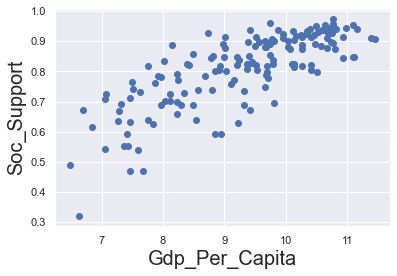

In [15]:
# checking the correlation between Gdp_per_capita and soc_support in these countries
# getting the two variables Gdp_per_capita and soc_support

x = raw_data["Gdp_Per_Capita"]
y = raw_data["Soc_Support"]

#getting a plot to observer the trend
plt.scatter(x,y)
plt.xlabel('Gdp_Per_Capita',fontsize=20)
plt.ylabel('Soc_Support',fontsize=20)
plt.show()

##### It's definitely an upward trend with higher gdp_per_capita translates to more social support. But how much is difference in numbers...

In [16]:
# finding the covariance between these two variables
from numpy import cov

covariance = cov(x,y)
print(covariance)

[[1.44381324 0.11409534]
 [0.11409534 0.0147509 ]]


##### the covariance matrix is showing a positive value of 0.11, now through linear regression we can get the trend in numbers.

In [17]:
# using statsmodel to list the summary of the data
modelX = sm.add_constant(x)
model = sm.OLS(y,modelX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Soc_Support   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     237.4
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           8.68e-33
Time:                        18:53:07   Log-Likelihood:                 178.24
No. Observations:                 153   AIC:                            -352.5
Df Residuals:                     151   BIC:                            -346.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0741      0.048      1.542      0.125      -0.021       0.169
Gdp_Per_Capita     0.0790      0.005     15.408      0.000       0.069       0.089
==============================================================================
Omnibus:                       16.658   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.356
Skew:                          -0.731   Prob(JB):                     6.27e-05
Kurtosis:                       3.948   Cond. No.                         74.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

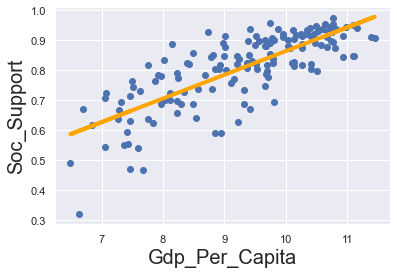

In [18]:
# creating the regression equation based on the coefficient
plt.scatter(x,y)
yhat = 0.0790*x + 0.0741
fig = plt.plot(x,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('Gdp_Per_Capita', fontsize=20)
plt.ylabel('Soc_Support', fontsize=20)
plt.show()

##### Based on the regression equation, it means that on average every 1% increase in social support is caused by a 7.9% surge in the gdp_per_capita. Which is relatively a bigger percentage, I believe people tend to support charities only under a secure savings bubble so they don't give away too much and have enough for their own personal basic or luxury needs.

### Question no. 4: Does having more freedom of choice results in more generosity? Also how is effect of bad Gdp_per_capita on generosity?

##### To answer the first part of the question we will compare the top 10 countries in the freedom of choice category and top 10 in the generosity category.

In [19]:
# getting the top 10 freedom_of_choice category leaders
top10Free = raw_data.sort_values("Freedom_of_choice",ascending = False).head(10)
top10Free = top10Free.drop(["Region","Score", "Gdp_Per_Capita", "Soc_Support", "Health_life_expectancy", "Generosity",
                           "Percept_of_corrupt"], axis=1)
top10Free.reset_index(drop=True, inplace=True)
top10Free

,Rank,CountryName,Freedom_of_choice
0,38,Uzbekistan,0.974998
1,106,Cambodia,0.959705
2,5,Norway,0.955750
3,2,Denmark,0.951444
4,1,Finland,0.949172
5,4,Iceland,0.948892
6,21,United Arab Emirates,0.941346
7,83,Vietnam,0.939593
8,7,Sweden,0.939144
9,8,New Zealand,0.936217


In [20]:
# getting the top 10 Generosity category leaders
top10Gener = raw_data.sort_values("Generosity", ascending=False).head(10)
top10Gener = top10Gener.drop(["Region","Score","Gdp_Per_Capita","Soc_Support","Health_life_expectancy",
                              "Freedom_of_choice","Percept_of_corrupt"], axis=1)
top10Gener.reset_index(drop=True, inplace=True)
top10Gener

,Rank,CountryName,Generosity
0,133,Myanmar,0.560664
1,84,Indonesia,0.519587
2,142,Haiti,0.400535
3,113,Gambia,0.343199
4,121,Kenya,0.294682
5,54,Thailand,0.268685
6,13,United Kingdom,0.263732
7,38,Uzbekistan,0.248427
8,4,Iceland,0.246944
9,22,Malta,0.214966


In [21]:
# combining both the dataframes with common countries in both the list

combineList = pd.merge(top10Free, top10Gener, how="inner", on=["Rank", "CountryName"])
combineList    

,Rank,CountryName,Freedom_of_choice,Generosity
0,38,Uzbekistan,0.974998,0.248427
1,4,Iceland,0.948892,0.246944


##### Based on the above list, it shows that only two countries are in the top10 of both categories and out of which only Iceland is in the top10. So higher freedom of choice in countries not completely relates to higher generosity. A scatter plot below will explain the trend for all the countries.

<AxesSubplot:xlabel='Generosity', ylabel='Freedom_of_choice'>

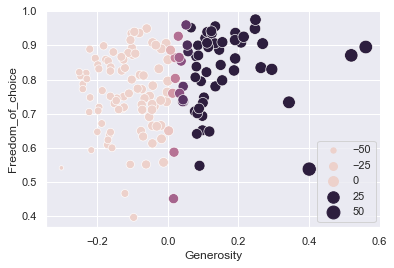

In [22]:
# creating the scatter plot
GenOvrChoice = raw_data.eval("(Generosity / Freedom_of_choice)*100")
sns.scatterplot(data=raw_data, x="Generosity", y="Freedom_of_choice", hue=GenOvrChoice,
                size=GenOvrChoice, sizes=(20, 200), hue_norm=(0, 7))


##### The above graph shows our two outlier countries Iceland and Uzbekistan with the better rate of Generosity given freedom of choice. The interesting thing here is some countries have that rate in negative as their generosity score is in negative even with more freedom of choice.

##### Now for the second part of the question, we will use a scatterplot of bottom20 Gdp_per_capita scores and its corresponding generosity scores to see the trend in those countries.

In [23]:
# getting the list of the bottom 20 countries in the gdp_per_capita category

bot20Gdp = raw_data.sort_values("Gdp_Per_Capita", ascending=False).tail(20)
bot20Gdp = bot20Gdp.drop(["Region", "Score", "Soc_Support", "Health_life_expectancy", "Percept_of_corrupt",
                         "Freedom_of_choice"], axis=1)
bot20Gdp.eval("GenOVRGdp = (Generosity / Gdp_Per_Capita)*100")

,Rank,CountryName,Gdp_Per_Capita,Generosity,GenOVRGdp
113,114,Mali,7.629852,-0.044367,-0.581491
149,150,Rwanda,7.600104,0.055484,0.730042
135,136,Ethiopia,7.509386,0.043377,0.577642
125,126,Uganda,7.500390,0.099487,1.326430
111,112,Burkina Faso,7.468545,-0.019081,-0.255478
126,127,Chad,7.467964,0.017835,0.238816
152,153,Afghanistan,7.462861,-0.096429,-1.292124
151,152,South Sudan,7.425360,0.016519,0.222461
141,142,Haiti,7.411329,0.400535,5.404355
134,135,Togo,7.357711,0.002668,0.036260


<AxesSubplot:xlabel='Gdp_Per_Capita', ylabel='Generosity'>

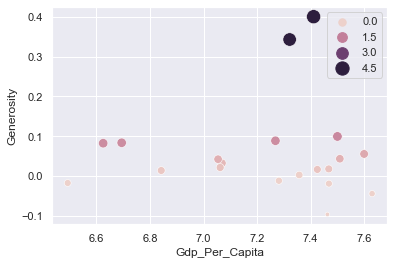

In [24]:
# creating a scatterplot to show the trend in the bottom 20 countries
GenOvrGDP = bot20Gdp.eval("(Generosity / Gdp_Per_Capita)*100")
sns.scatterplot(data=bot20Gdp, x="Gdp_Per_Capita", y="Generosity", hue=GenOvrGDP,
                size=GenOvrGDP, sizes=(20, 200), hue_norm=(0, 4))

##### the graph and above list shows that there are only two positive outliers(Gambia, Haiti) in bottom 20 gdp_per_capita countries where the generosity score hasn't gone down which is quite exceptional given the low gdp_per_capita and there can be more reasons to that as well which the data doesn't reflects, where as all the other countries have kept the trend to the lower with low generosity scores.

### Question no 5: What is the regional distribution of happiest countries?

Text(0.5, 1.0, 'Top 50 Happiest Countries - Region wise')

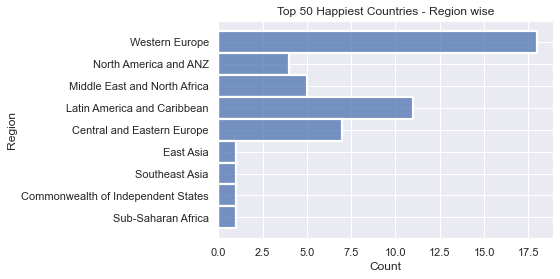

In [30]:
# creating a bar chart to show the regional happiest countries count
raw_data = pd.read_csv("Backend/Data/2020.csv")
top50 = raw_data.iloc[:49,:]
mid50 = raw_data.iloc[50:,:101]
bottom50 = raw_data.iloc[102:,:152]
sns.histplot(data=top50, y="Region").set_title("Top 50 Happiest Countries - Region wise")

Text(0.5, 1.0, 'Mid 50 Happiest Countries - Region wise')

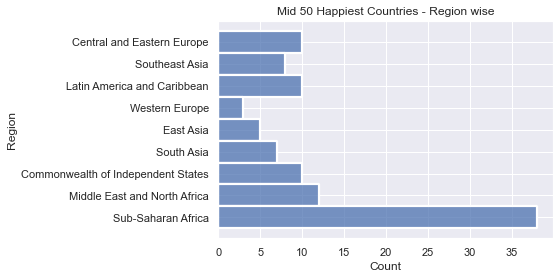

In [31]:
sns.histplot(data=mid50, y="Region").set_title("Mid 50 Happiest Countries - Region wise")

Text(0.5, 1.0, 'Bottom 50 Happiest Countries - Region wise')

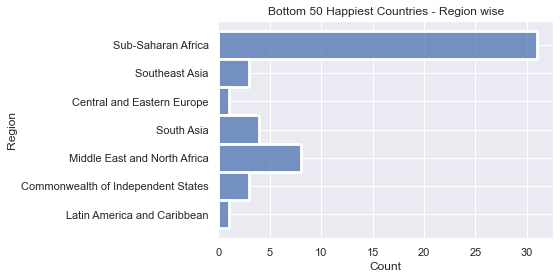

In [32]:
sns.histplot(data=bottom50, y="Region").set_title("Bottom 50 Happiest Countries - Region wise")

##### 1) No country from the North America and ANZ region is in the mid50 and bottom50 happiest countries, making it a relatively happier region based on the categories it's evaluated.
##### 2) Most Sub-Saharan countries are listed in the mid to bottom tier of the ranking making it an outlier in the lower average of happiness score.
##### 3) the average scores byregion below will show the detail difference by scores and corresponding categories.

In [28]:
avgScoresbyReg = raw_data.groupby(["Region"]).mean().sort_values(["Score"], ascending=False).drop(["Rank"], axis=1)
avgScoresbyReg.insert(0, "Country Count", raw_data.groupby(["Region"]).count().drop(["Rank","CountryName",
                "Gdp_Per_Capita","Soc_Support", "Health_life_expectancy","Freedom_of_choice", "Generosity",
                "Percept_of_corrupt"],axis=1), True)
avgScoresbyReg 

,Country Count,Score,Gdp_Per_Capita,Soc_Support,Health_life_expectancy,Freedom_of_choice,Generosity,Percept_of_corrupt
Region,,,,,,,,
North America and ANZ,4,7.173525,10.709919,0.933842,72.177067,0.907045,0.164180,0.431717
Western Europe,21,6.899219,10.688402,0.913134,72.863565,0.854993,0.038923,0.528730
Latin America and Caribbean,21,5.981786,9.303024,0.856891,66.717328,0.830684,-0.071901,0.801526
Central and Eastern Europe,17,5.883818,9.975703,0.874566,68.148988,0.770271,-0.102712,0.850859
East Asia,6,5.714850,10.316895,0.859852,71.094847,0.761027,-0.051978,0.702266
Southeast Asia,9,5.383367,9.366847,0.824093,64.710476,0.912667,0.161870,0.704920
Commonwealth of Independent States,12,5.358342,9.207234,0.856729,64.726558,0.784004,-0.041285,0.746387
Middle East and North Africa,17,5.227159,9.713648,0.796720,65.313611,0.710171,-0.084426,0.761510
South Asia,7,4.475443,8.559491,0.708996,62.448662,0.771805,0.035106,0.790656


##### The score and country count reflects how poor sub-saharan countries are doing even after having the highest no of countries in the region, where as the western european countries are doing really well with a substantial amount of countries within the region.

### Question no 06: Most outliers in each category?

#### Using seaborns boxplots, different plots will showcase no. of outliers in each catergory.

<AxesSubplot:xlabel='Percept_of_corrupt'>

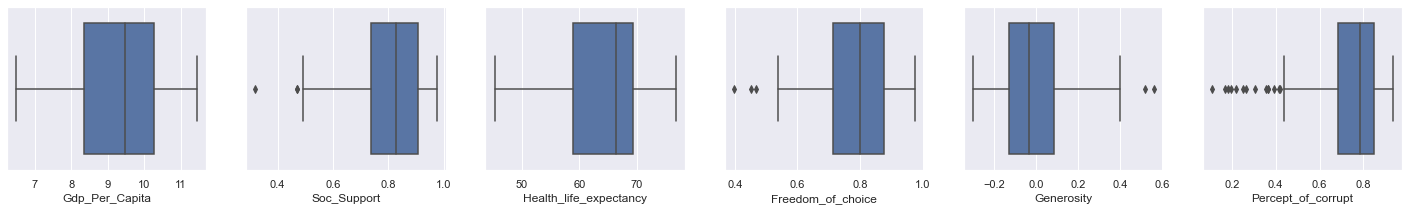

In [29]:
# outlier in Gdp_per_capita
fig, axs = plt.subplots(ncols=6 ,figsize=(25,3))
sns.boxplot(x=raw_data["Gdp_Per_Capita"], ax=axs[0])
sns.boxplot(x=raw_data["Soc_Support"], ax=axs[1])
sns.boxplot(x=raw_data["Health_life_expectancy"], ax=axs[2])
sns.boxplot(x=raw_data["Freedom_of_choice"], ax=axs[3])
sns.boxplot(x=raw_data["Generosity"], ax=axs[4])
sns.boxplot(x=raw_data["Percept_of_corrupt"], ax=axs[5])

##### the above plots shows that perception of corruption is a category with most outliers as in many countries the idea of corruption is perceived alot by its population but the interesting part is that these outliers are showing countries with least perception of corruption in goverment body which is indeed fascinating.
##### Likewise, the outliers in generosity category are also the better ones relative to other countries. whereas the categories social support and freedom of choice boasts some outliers in the negative direction which indeed is not a good picture but the few quantity of them makes a small yet an important room for improvement.

### The above six questions made me understand a lot about the measure of happiness and how countries in the world fare to it. Indeed, there is still a lot to understand about the happiness factors in these countries and maybe the definition of happiness itself but the patterns that came out from each of the question I tried to solve made me understand the significant relationship we carry with all these categories and how a certain change of geographical location provides a shift in direction.
### I hope to solve more questions like these and I hope to get towards a better score of happiness for us all!